# AML1413 Introduction to AI - Assignment #1

Group members:
- Aashutosh Shahi C0919383
- Bimal Kumar Shrestha C0919385
- Danilo Diaz Valencia C0889539
- Ernie Sumoso C0881591
- Hemant Gurung C0919388
- Roshan Nepal C0919373
- Sopnil Nepal C0919372

# Written Solutions

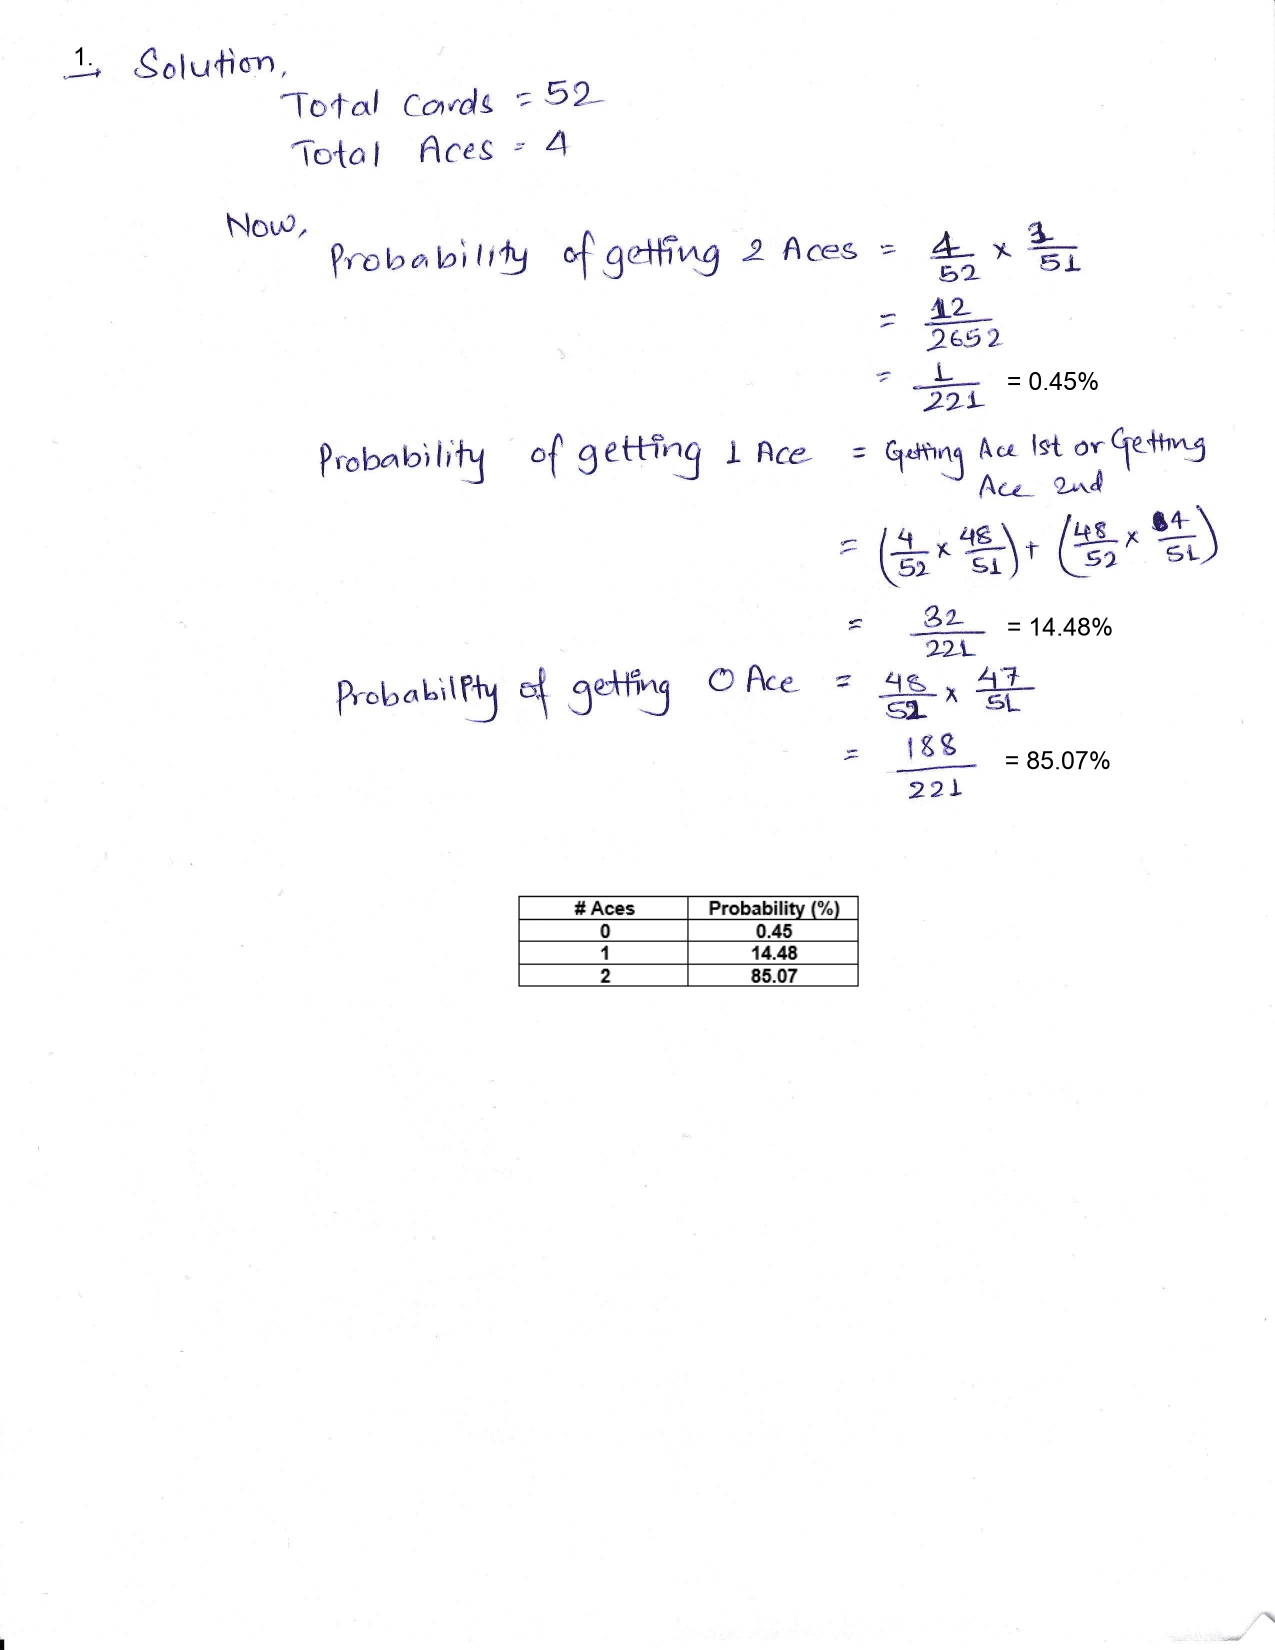

In [4]:
from IPython.display import Image
Image(filename='img001.jpg')

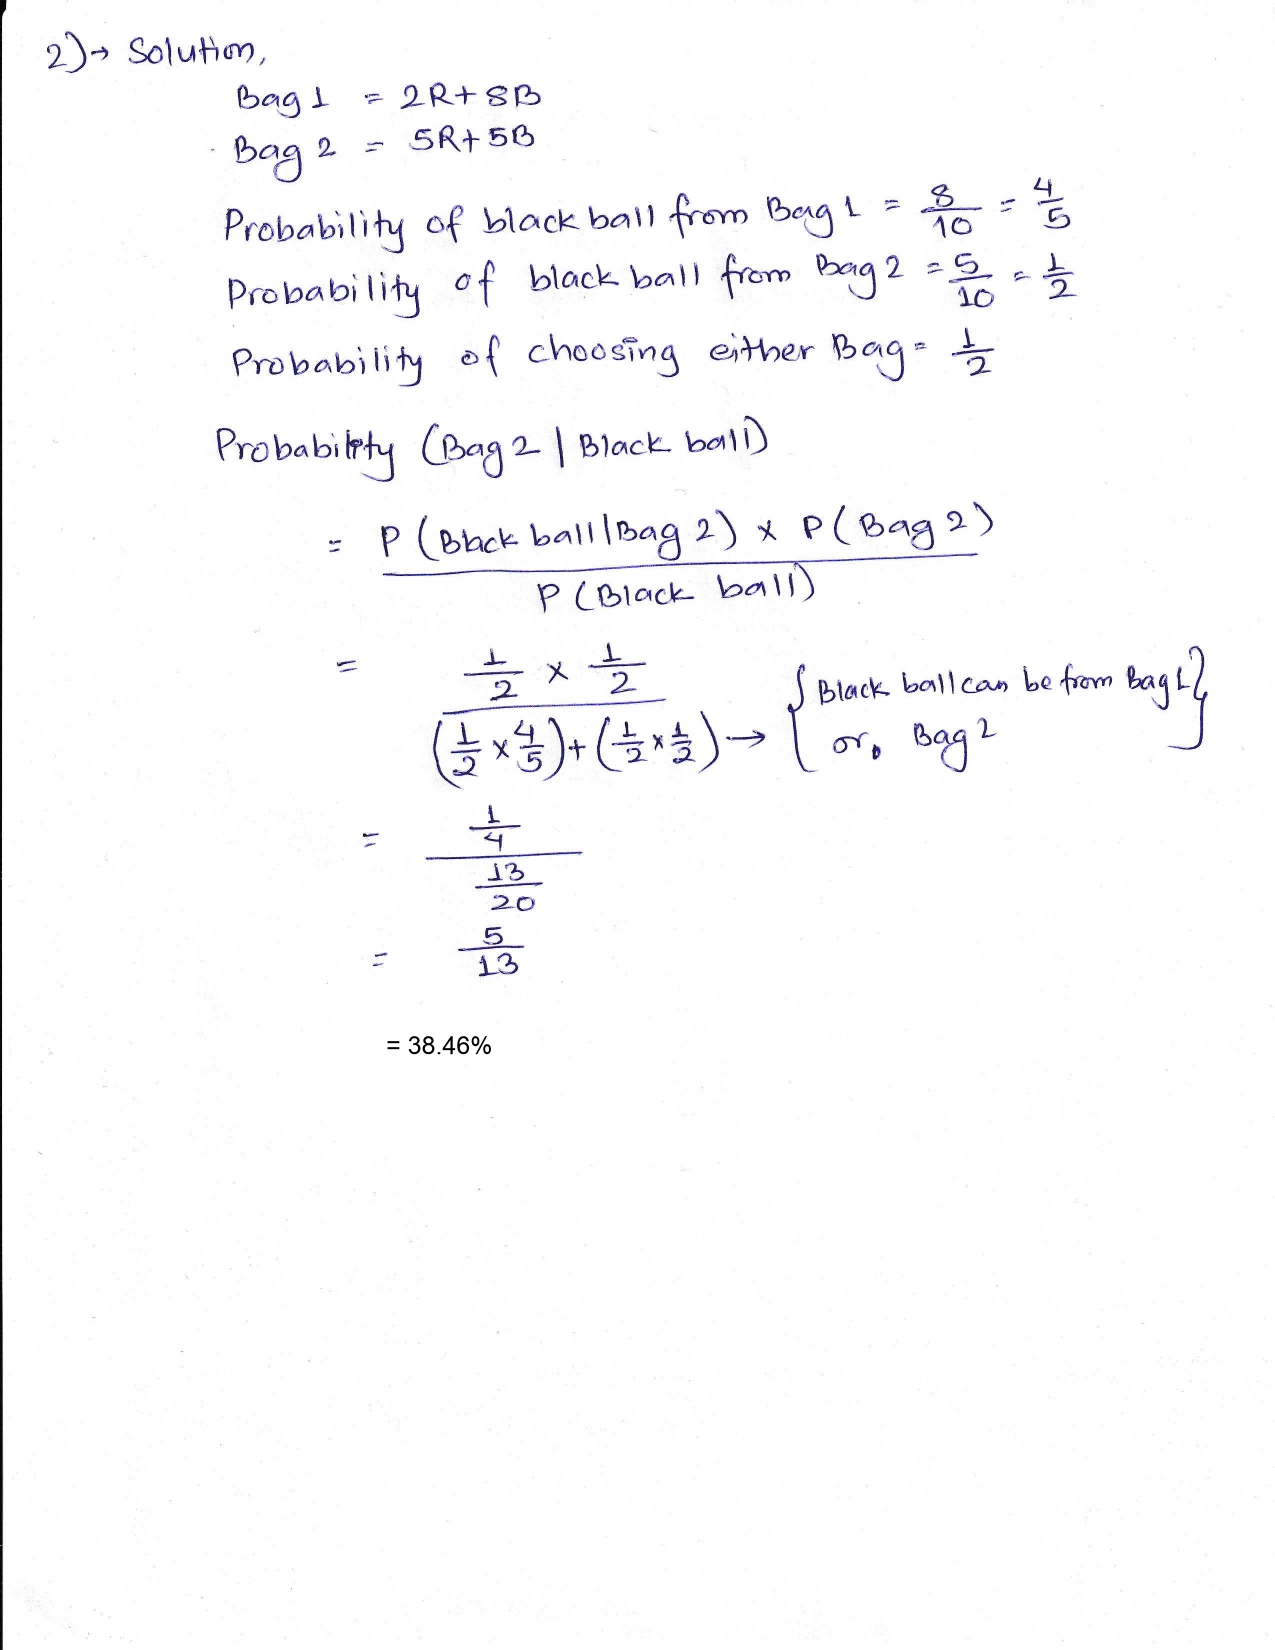

In [5]:
Image(filename='img002.jpg')

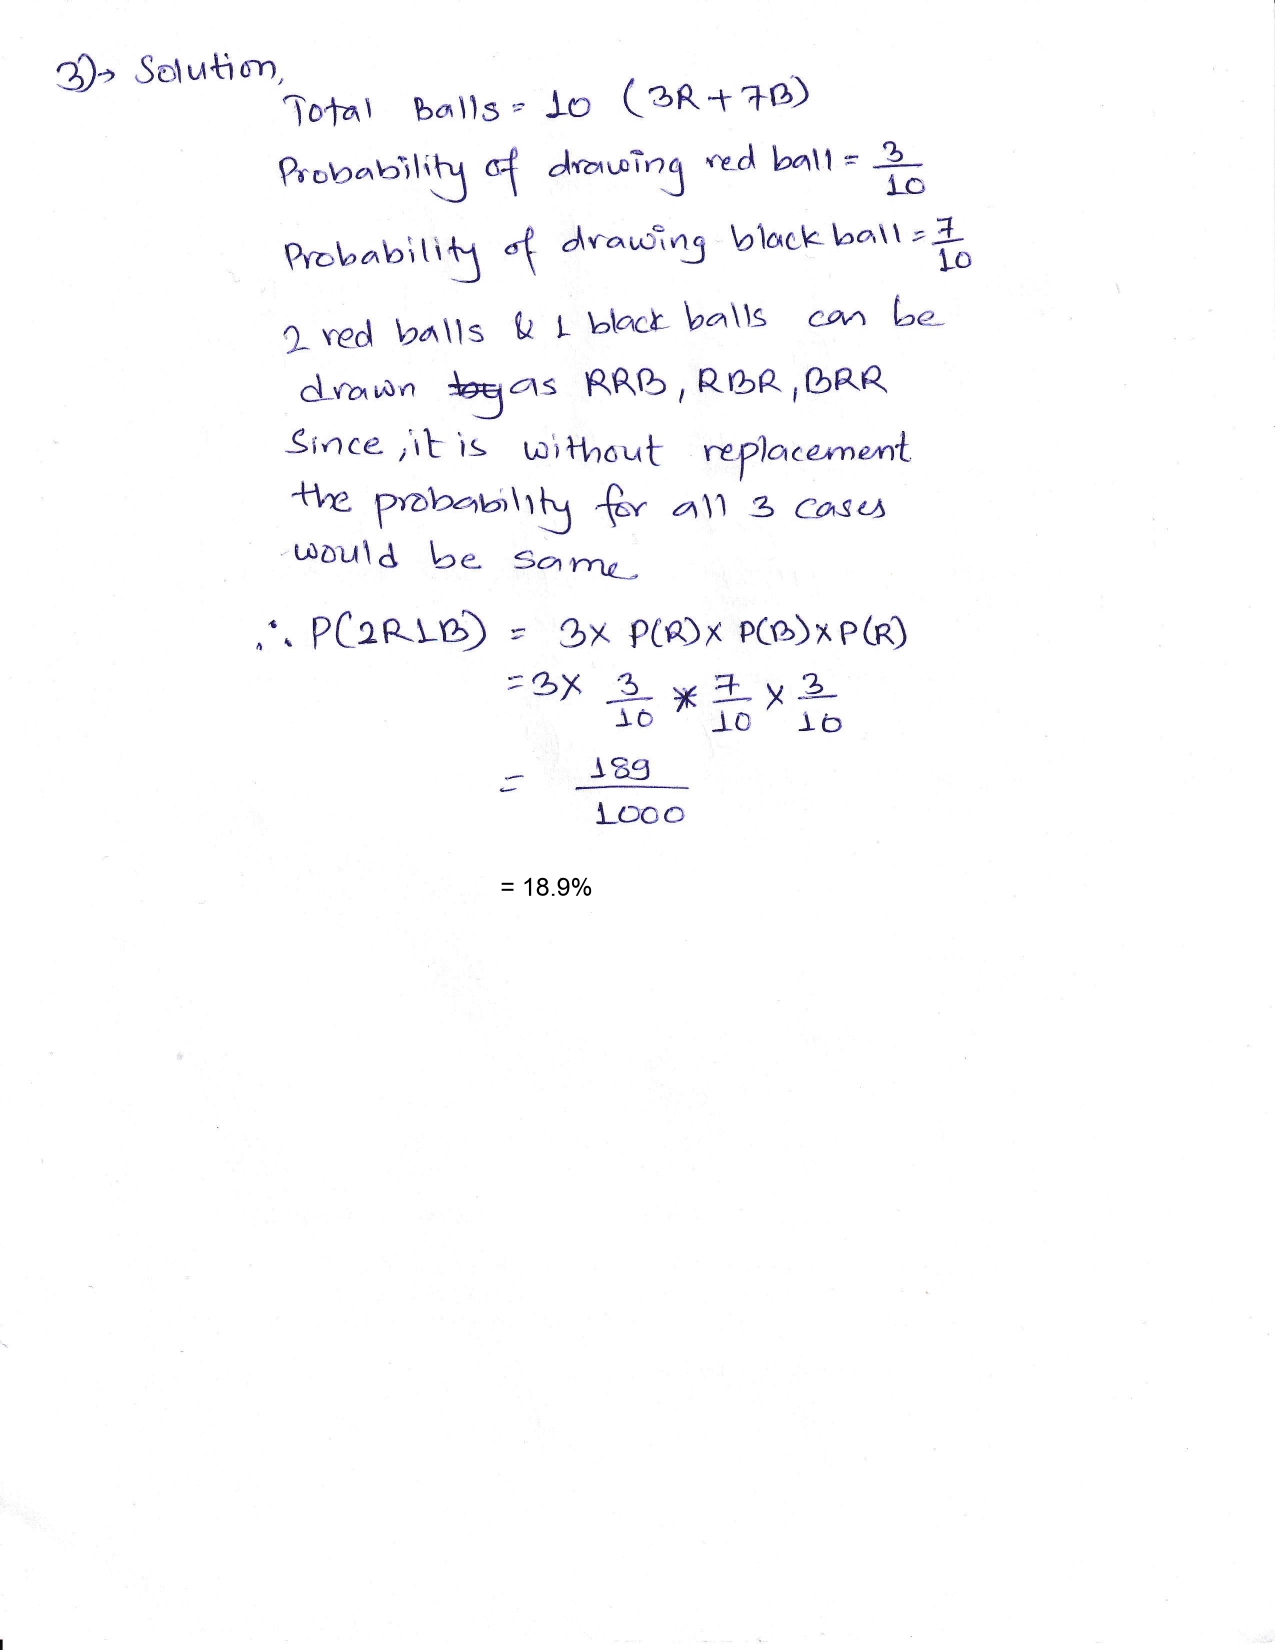

In [6]:
Image(filename='img003.jpg')

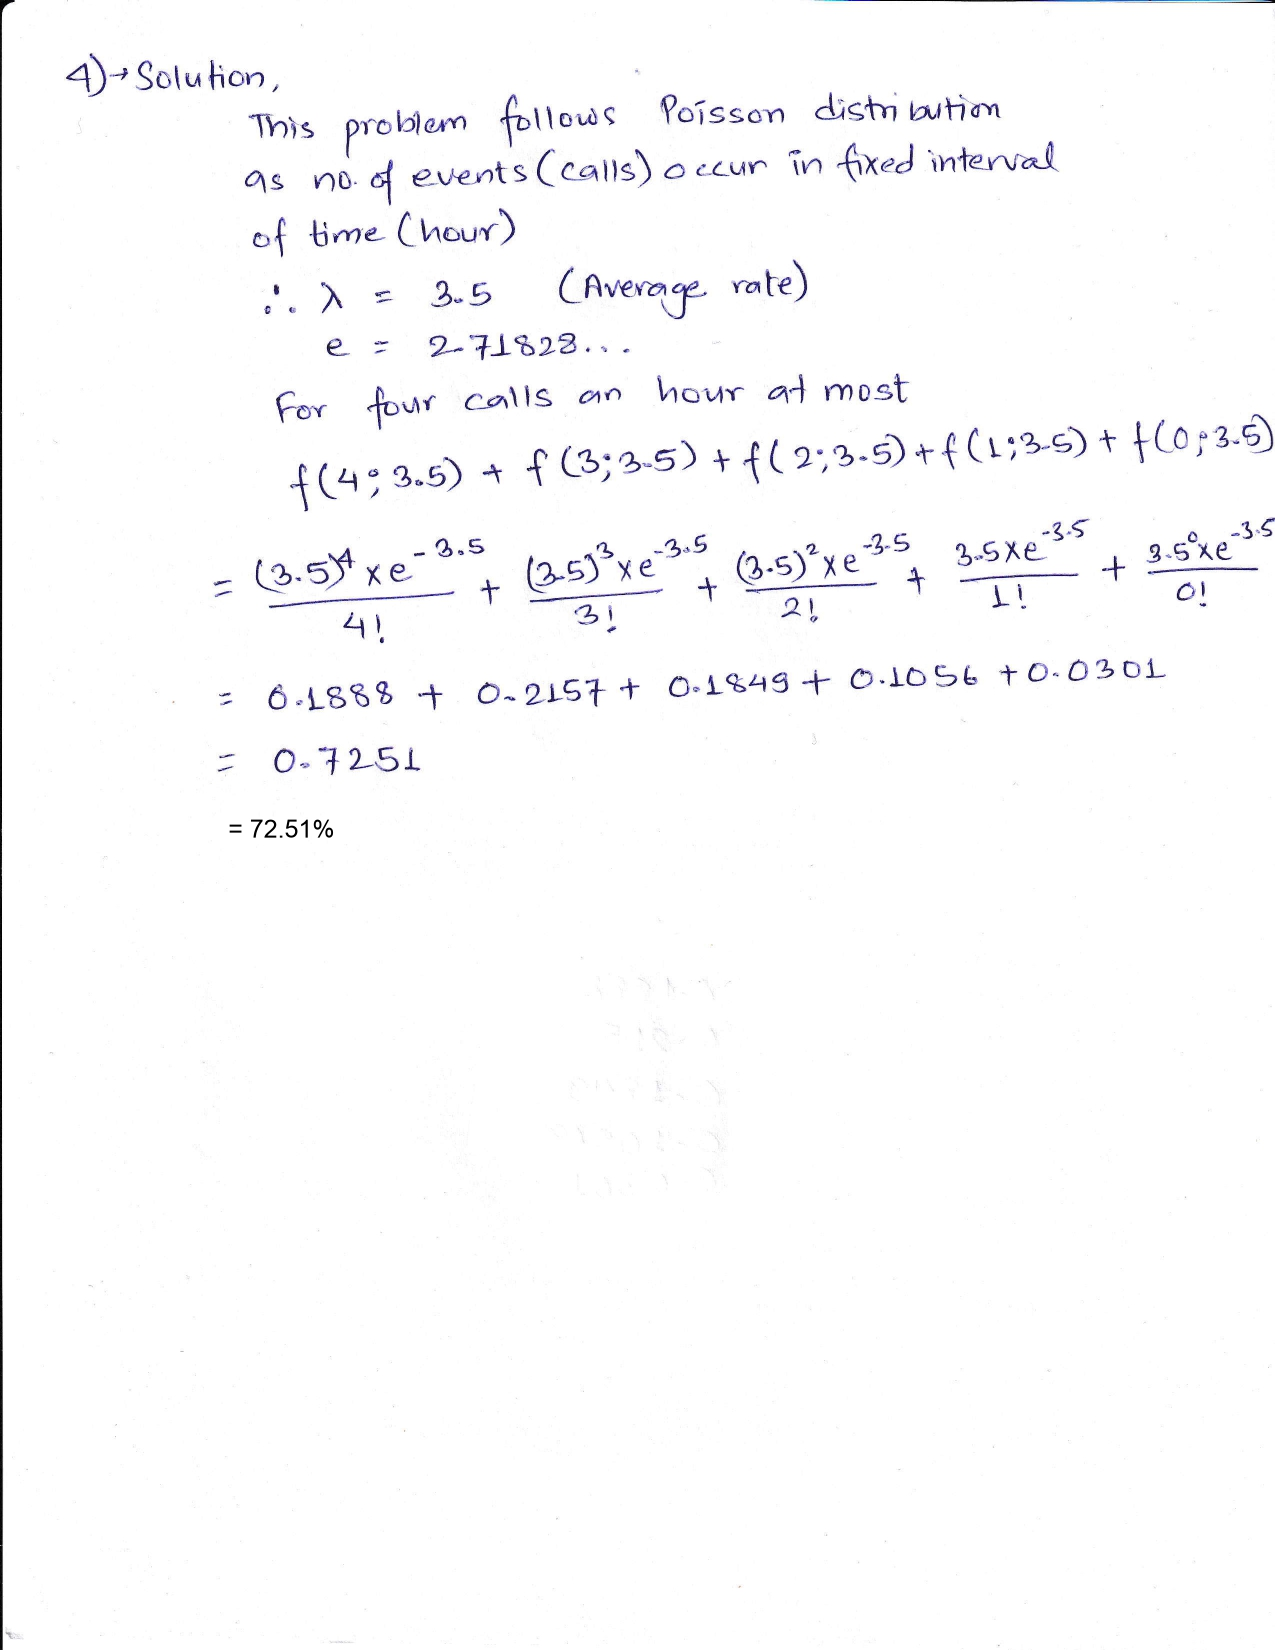

In [7]:
Image(filename='img004.jpg')

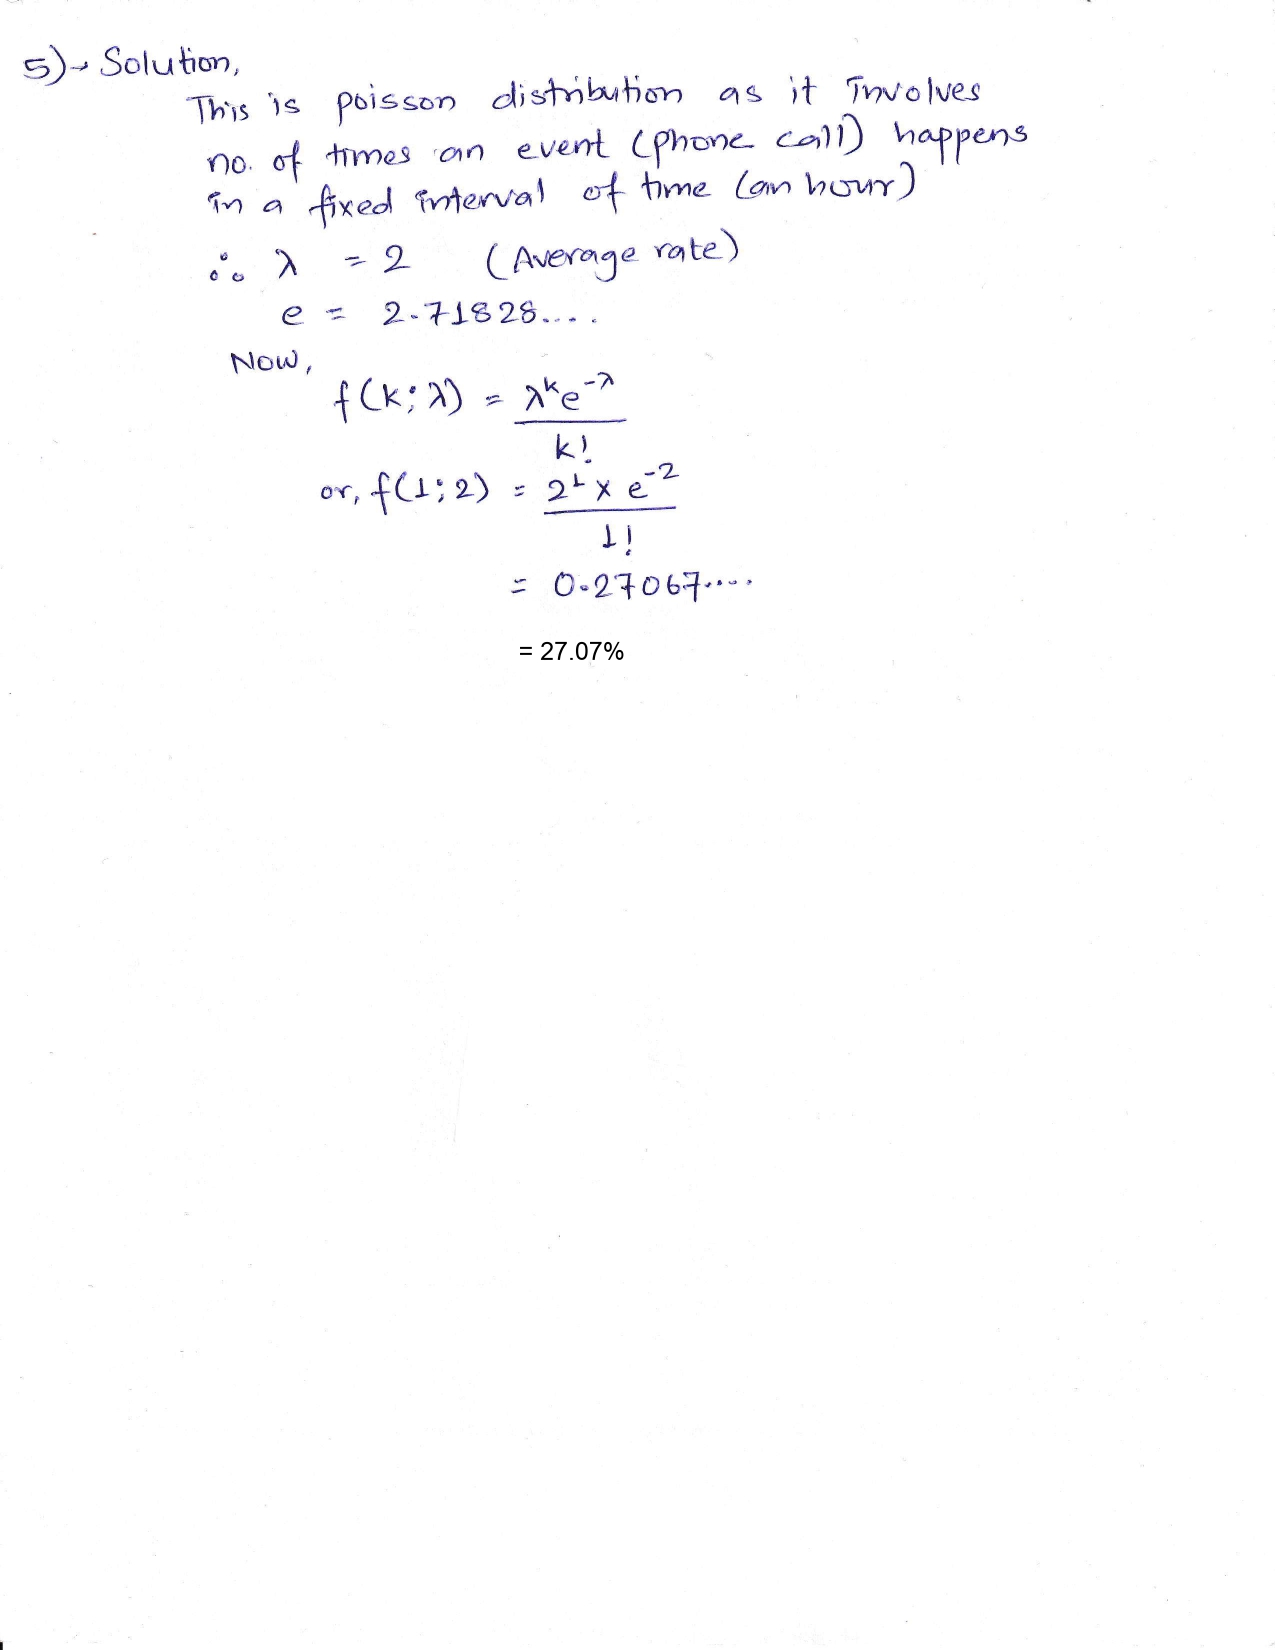

In [8]:
Image(filename='img005.jpg')

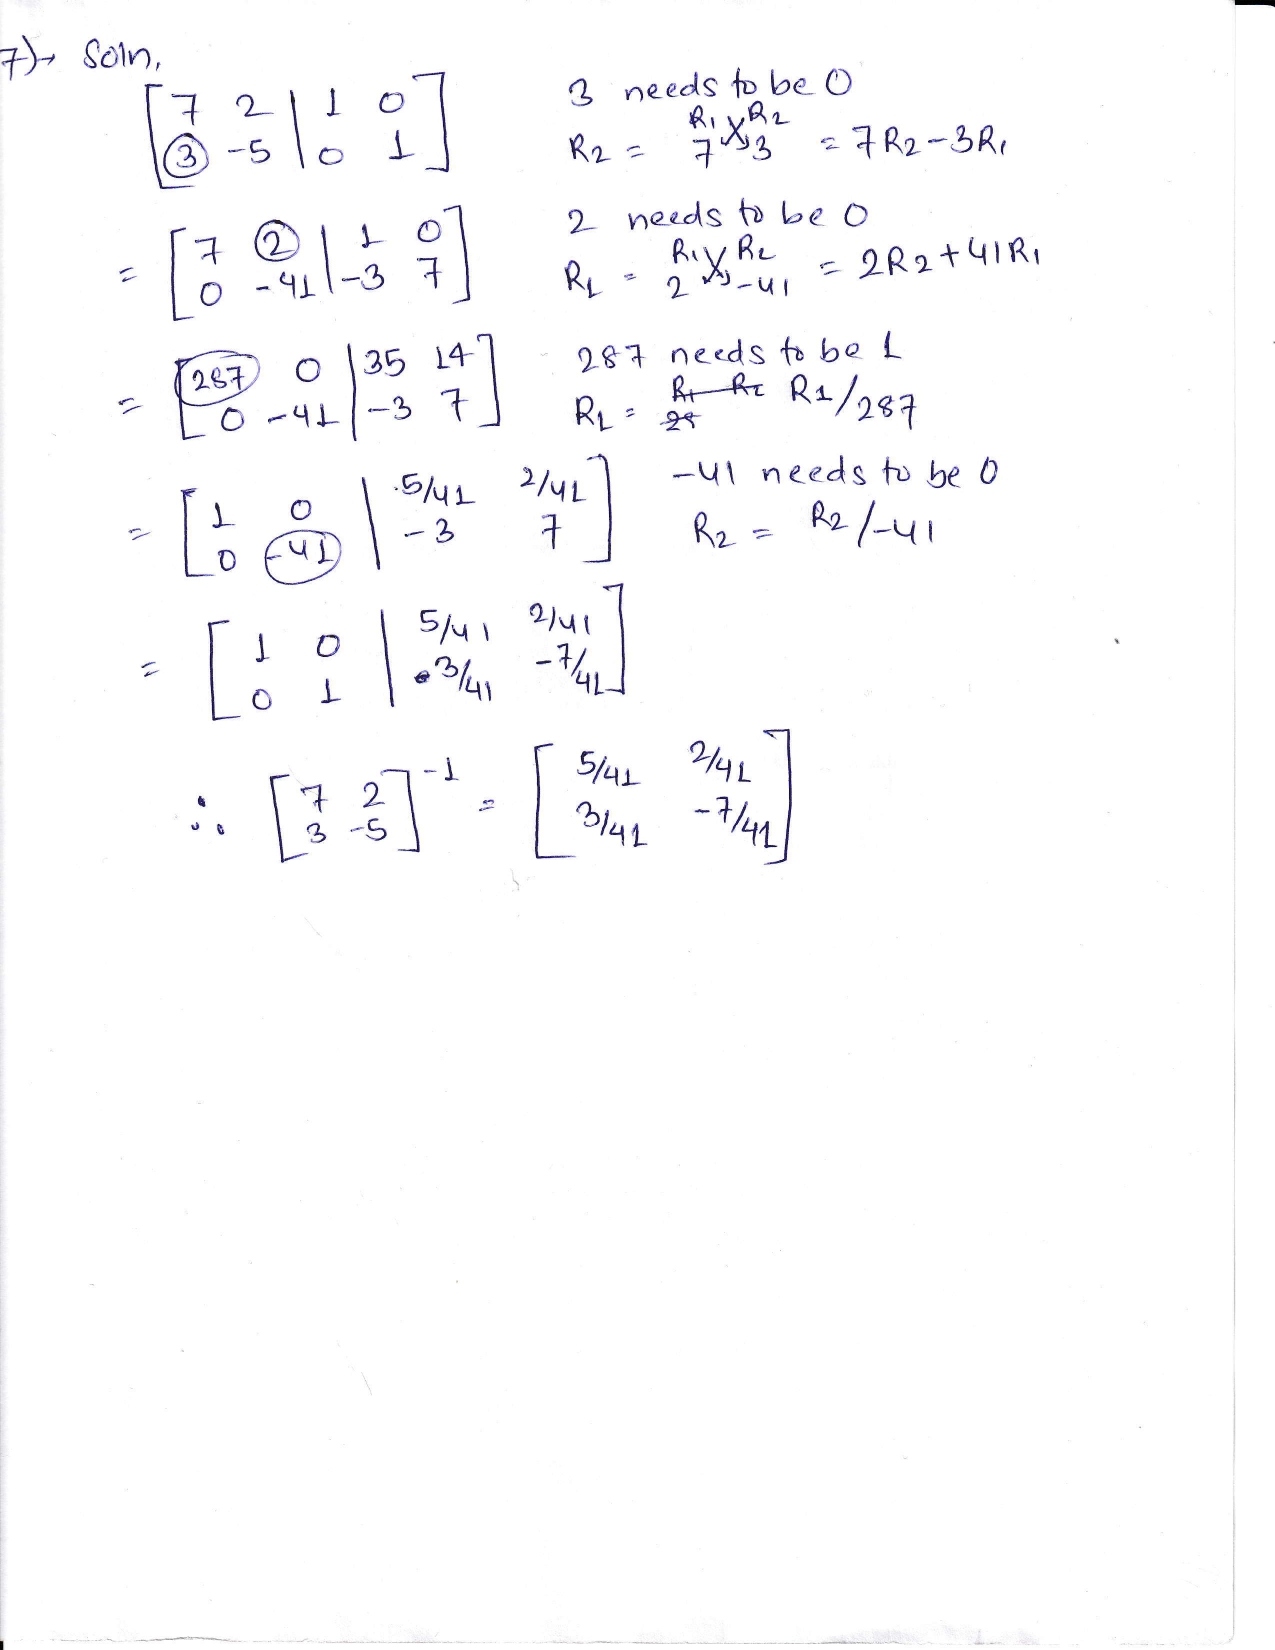

In [9]:
Image(filename='img006.jpg')

# Solutions using Python code

In [1]:
import math # importing python library to perform basic math operations like factorial and euler exponential

__Q1.__ You draw two cards from pack of 52 shuffled cards (without replacement). Create a Python Program to generate a Probability Distribution Table for getting zero to at most 2 ACES.


In [2]:
# Define a Deck class as an internal representation of a pack of 52 shuffled cards
class Deck():
    def __init__(self):
        self.cards = 52
        self.aces = 4
    
    # Draw 1 card from the deck, if it's an ace we deduct 1 from the aces counter
    def draw_card(self, is_ace):
        self.aces -= 1 if is_ace else 0
        self.cards -= 1
    
    # Calculate the probability of drawing a card (ace or not ace)
    def get_probability_of_drawing_card(self, is_ace):
        return (self.aces / self.cards) if is_ace else ((self.cards - self.aces) / self.cards)

# Calculate the probability of drawing cards
# "list_is_ace" parameter: boolean list defining if drawn cards are aces
def get_probability_of_drawing_cards(cards):
    deck = Deck()
    probability = 1
    # For each card, update the probability of drawing a card and then draw it
    for card in cards:
        is_ace = (card == 'A')
        probability *= deck.get_probability_of_drawing_card(is_ace)
        deck.draw_card(is_ace)
    return probability

# Let's print the distribution table
print("Probability Distribution Table")
print("# Aces\t| Probability (%)")
print("-------\t|------------------")
print(f" 0\t| {round(get_probability_of_drawing_cards('CC') * 100, 4)}")
# There are 2 ways of drawing 1 ace: ACE,CARD - CARD,ACE
print(f" 1\t| {round(get_probability_of_drawing_cards('AC') * 100 + get_probability_of_drawing_cards('CA') * 100, 4)}")
print(f" 2\t|  {round(get_probability_of_drawing_cards('AA') * 100, 4)}")

Probability Distribution Table
# Aces	| Probability (%)
-------	|------------------
 0	| 85.0679
 1	| 14.4796
 2	|  0.4525



__Q2.__ Bag I contain 2 red and 8 black balls while another Bag II contains 5 red and 5 black balls. One ball is drawn at random from one of the bags, and it is found to be black. Create a Python Program to find the probability that it was drawn from Bag 2.

In [3]:
# Define a Bag class as an internal representation of a bag with red and black balls 
class Bag():
    def __init__(self, reds, blacks):
        self.reds = reds
        self.blacks = blacks
        self.initial_reds = reds
        self.initial_blacks = blacks
    
    # Draw 1 ball from the bag, if it's red or black we deduct 1 from the corresponding counter
    def draw_ball(self, is_red):
        self.reds -= 1 if is_red else 0
        self.blacks -= 1 if not is_red else 0
        
    # Calculate the probability of drawing 1 ball (red or black)
    def get_probability_of_drawing_ball(self, is_red):
        return (self.reds / self.total()) if is_red else (self.blacks / self.total())
    
    # Replace balls from the bag
    def replace_balls(self):
        self.reds = self.initial_reds
        self.blacks = self.initial_blacks
    
    # Get the total of balls from the bag
    def total(self):
        return self.reds + self.blacks

# Calculate the probability of selecting 1 bag from the bags
def get_probability_of_selecting_bag(bag, bags):
    return 1/len(bags)

# Calculate the probability of selecting a ball from all bags by adding the balls from all bags
def get_probability_of_drawing_ball_from_all_bags(bags, is_red):
    reds = 0
    blacks = 0
    for bag in bags:
        reds += bag.reds
        blacks += bag.blacks
    total = reds + blacks
    return (reds / total) if is_red else (blacks / total)

# Create bags with corresponding balls
bag_1 = Bag(2, 8)
bag_2 = Bag(5, 5)
bags = [bag_1, bag_2]

# Use Bayes theorem to calculate the probability that the black ball was drawn from bag 2
# P(bag 2 | black ball) = P(bag 2) * P(black ball | bag 2) / P(black ball)
bayes_theorem_answer = get_probability_of_selecting_bag(bag_2, bags) * bag_2.get_probability_of_drawing_ball(False) / get_probability_of_drawing_ball_from_all_bags(bags, False)

# Let's print the result
print(f"Probability that the black ball was drawn from bag 2:")
print(f"{round(bayes_theorem_answer * 100, 4)} %")

Probability that the black ball was drawn from bag 2:
38.4615 %


__Q3.__ There are 3 red and 7 black balls in a bag. You are asked to draw 3 balls at random (with replacement) in three different trials, Create a Python program to find the probability of getting two red balls and one black ball?  (4 Marks)

In [4]:
# Calculate the probability of multiple draws from a bag, with or without replacement
def get_probability_of_drawing_balls(draws, bag, replacement):
    probability = 0
    # for each draw let's sum probabilities
    for draw in draws:
        draw_probability = 1
        # for each ball in the draw we update the probability, draw the ball, and replace if needed
        for ball in draw:
            is_red = (ball == 'R')
            draw_probability *= bag.get_probability_of_drawing_ball(is_red)
            bag.draw_ball(is_red)
            if replacement: bag.replace_balls()
        probability += draw_probability
    return probability

# Define our bag and draws. There are 3 possible ways to get 2 red balls and 1 black: RED,RED,BLACK - RED,BLACK,RED - BLACK,RED,RED
bag = Bag(3, 7)
draws = ['RRB', 'RBR', 'BRR']
result = get_probability_of_drawing_balls(draws, bag, True)

# Let's print the result
print("Probability of drawing 2 red balls and 1 black ball from the bag:")
print(f"{round(result * 100, 4)} %")

Probability of drawing 2 red balls and 1 black ball from the bag:
18.9 %


__Q4.__ A Customer Call center receives on average 3.5 calls every hour. Write a Python Program to find the probability that it will receive at most 4 calls every hour? 

In [5]:
# Define a Poisson distribution
class PoissonDistribution:
    def __init__(self, avg_rate):
        self.avg_rate = avg_rate
    
    # Calculate the probability (known formula) based on the average rate and k number of events
    def get_probability(self, k):
        probability = ((self.avg_rate)**k * math.exp(-self.avg_rate)) / math.factorial(k)
        return probability

# Calculate the probability of at most k events happening for a Poisson distribution
def get_probability_at_most_k_events(k, poisson):
    probability = 0
    count = 0
    # Calculate and sum the probabilities for each number from zero to k
    for count in range(k + 1):
        probability += poisson.get_probability(count)
    return probability

pd = PoissonDistribution(3.5)
result = get_probability_at_most_k_events(4, pd)

# Let's print the result
print("Probability of receiving at most 4 calls every hour:")
print(f"{round(result * 100, 4)} %")

Probability of receiving at most 4 calls every hour:
72.5445 %


__Q5.__ The Student Services at Cestar College receives 2 phone calls per hour. Write a Python Program to find the probability that a phone call will come within the next hour. 

In [6]:
pd = PoissonDistribution(2)
# Calculate the probability of getting exactly 1 phone call
# P(k = 1)
result = pd.get_probability(1)
print("Probability that a phone call will come within the next hour:")
print(f"{round(result * 100, 4)} %")

Probability that a phone call will come within the next hour:
27.0671 %


__Q7.__ Create a Python program to find the Inverse of the following Matrix, using the concept shown in the class. Use of Linalg is restricted.
[[7 2], [3 -5]]

In [7]:
# Define an square 2x2 matrix
class Matrix2x2():
    def __init__(self, row1, row2):
        self.a = row1[0]
        self.b = row1[1]
        self.c = row2[0]
        self.d = row2[1]
    
    # Calculate the determinant (known formula)
    def get_determinant(self):
        return 1 / (self.a * self.d - self.b * self.c)
    
    # Calculate and return the inverse matrix of the current matrix (using the determinant)
    def get_inverse_matrix(self):
        det = self.get_determinant()
        return Matrix2x2([self.d * det, - self.b * det], [- self.c * det, self.a * det])
    
    # Overload the print representation of the matrix
    def __repr__(self):
        return f"[ {self.a}  {self.b} ]\n[ {self.c} {self.d} ]"

# Let's define our matrix and get its inverse
matrix = Matrix2x2([7,2], [3,-5])
matrix.get_inverse_matrix()

[ 0.12195121951219512  0.04878048780487805 ]
[ 0.07317073170731708 -0.17073170731707318 ]